In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import glob, os
import datetime
%matplotlib inline

# Reading and consolidating excel files

In [2]:
# files_path = '../data/IMU Dataset'
# files = glob.glob(files_path)
# folders = ['ADLs', 'Falls', 'Near_Falls']

# df = pd.DataFrame()

# for i in range(1,11):
#     print('Subject: '+str(i))
#     for folder in folders:
#         print('-- Trial Type: '+str(folder))
#         path = files_path+'/sub'+str(i)+'/'+str(folder)+'/*.xlsx'
#         files = glob.glob(path)

#         # create a list of dataframes, one for each file, and assign a column with the name of the file
#         dfs_list = [pd.read_excel(fp).assign(FileName = os.path.basename(fp)) for fp in files]

#         df_temp = pd.DataFrame()
#         df_temp = pd.concat(dfs_list)
#         df_temp['subject'] = i
#         df_temp['trial_type'] = folder
        
#         df = df.append(df_temp)

In [3]:
#save the dataframe in a Pickle file
# pickle.dump(df, open("full_dataset.p", "wb"))

# load the dataframe
df = pickle.load(open("full_dataset.p", "rb"))
df.head()

,Time,r.ankle Acceleration X (m/s^2),r.ankle Acceleration Y (m/s^2),r.ankle Acceleration Z (m/s^2),r.ankle Angular Velocity X (rad/s),r.ankle Angular Velocity Y (rad/s),r.ankle Angular Velocity Z (rad/s),r.ankle Magnetic Field X (uT),r.ankle Magnetic Field Y (uT),r.ankle Magnetic Field Z (uT),...,waist Acceleration Z (m/s^2),waist Angular Velocity X (rad/s),waist Angular Velocity Y (rad/s),waist Angular Velocity Z (rad/s),waist Magnetic Field X (uT),waist Magnetic Field Y (uT),waist Magnetic Field Z (uT),FileName,subject,trial_type
0,1304799112429680,-9.691464,-0.240769,-1.514349,0.218779,0.055136,-0.011516,33.449158,19.266598,15.818048,...,2.294797,0.150650,1.112724,-0.005126,45.724129,-24.729599,-24.925210,JXL_SQ_trial1.xlsx,1,ADLs
1,1304799112437500,-9.698196,-0.245077,-1.509888,0.213975,0.059683,-0.016308,33.449158,19.266598,15.818048,...,2.297199,0.150732,1.119032,-0.005089,43.054999,-27.175334,-17.818824,JXL_SQ_trial1.xlsx,1,ADLs
2,1304799112445310,-9.707324,-0.240524,-1.503184,0.215362,0.048608,-0.008371,33.925814,18.780263,16.358234,...,2.299551,0.142437,1.112306,-0.005148,35.924348,-24.854392,-22.314215,JXL_SQ_trial1.xlsx,1,ADLs
3,1304799112453120,-9.700565,-0.238417,-1.503189,0.212007,0.051853,-0.006869,33.925814,18.780263,16.358234,...,2.285412,0.145763,1.115626,-0.005121,40.471139,-33.319708,-20.664150,JXL_SQ_trial1.xlsx,1,ADLs
4,1304799112460930,-9.698231,-0.242868,-1.507656,0.217024,0.055225,-0.008403,33.436905,18.789406,16.859036,...,2.301899,0.152772,1.123509,-0.017021,45.633920,-24.349124,-20.064366,JXL_SQ_trial1.xlsx,1,ADLs


In [4]:
# Load metadata (file genenerated in notebook exploratory_data_analysis)
meta = pickle.load(open("./metadata.p", "rb"))
meta_acceletarion = list(meta[meta.measure=='acceleration'].index)

## Including implicit features

In [5]:
df['trial_type'].value_counts()

ADLs          498810
Falls         403402
Near_Falls    288157
Name: trial_type, dtype: int64

In [6]:
# 'Trial Type' is not ordinal, so we will need dummy variables

# extraction of the trial number from the file name
# Not Ordinal: necessary dummy variables
df['trial_num'] = df['FileName'].apply(lambda x: x.replace('.xlsx','').split('_')[-1])

# extraction of the trial subtype (slip, trip, pick object from ground, etc) from the file name
# Necessary dummy variables
df['trial_subtype'] = df['FileName'].apply(lambda x: x.split('_')[1])

# column with the real date and time of the measurement
# according to the README.txt, the Time column is the number of microseconds from 01/01/1970
initial = datetime.datetime(1970,1,1,0,0,0)
df['time_datetime'] = df.Time.apply(lambda x: (initial + datetime.timedelta(microseconds=x)))
# creating the column 'Time_datetime' in a pandas datetime format
df['time_datetime'] = df.time_datetime.apply(lambda t: pd.datetime(t.year,t.month,t.day,t.hour,t.minute,t.second,t.microsecond))

###### The first 3 characters of the file name seems to be a supercategory of the trial_subtype.
###### This way, I believe we can discard it and use just trial_subtype
df['target'] = np.where(df['trial_type'] == 'Falls', 1, 0)
df.head()

,Time,r.ankle Acceleration X (m/s^2),r.ankle Acceleration Y (m/s^2),r.ankle Acceleration Z (m/s^2),r.ankle Angular Velocity X (rad/s),r.ankle Angular Velocity Y (rad/s),r.ankle Angular Velocity Z (rad/s),r.ankle Magnetic Field X (uT),r.ankle Magnetic Field Y (uT),r.ankle Magnetic Field Z (uT),...,waist Magnetic Field X (uT),waist Magnetic Field Y (uT),waist Magnetic Field Z (uT),FileName,subject,trial_type,trial_num,trial_subtype,time_datetime,target
0,1304799112429680,-9.691464,-0.240769,-1.514349,0.218779,0.055136,-0.011516,33.449158,19.266598,15.818048,...,45.724129,-24.729599,-24.925210,JXL_SQ_trial1.xlsx,1,ADLs,trial1,SQ,2011-05-07 20:11:52.429680,0
1,1304799112437500,-9.698196,-0.245077,-1.509888,0.213975,0.059683,-0.016308,33.449158,19.266598,15.818048,...,43.054999,-27.175334,-17.818824,JXL_SQ_trial1.xlsx,1,ADLs,trial1,SQ,2011-05-07 20:11:52.437500,0
2,1304799112445310,-9.707324,-0.240524,-1.503184,0.215362,0.048608,-0.008371,33.925814,18.780263,16.358234,...,35.924348,-24.854392,-22.314215,JXL_SQ_trial1.xlsx,1,ADLs,trial1,SQ,2011-05-07 20:11:52.445310,0
3,1304799112453120,-9.700565,-0.238417,-1.503189,0.212007,0.051853,-0.006869,33.925814,18.780263,16.358234,...,40.471139,-33.319708,-20.664150,JXL_SQ_trial1.xlsx,1,ADLs,trial1,SQ,2011-05-07 20:11:52.453120,0
4,1304799112460930,-9.698231,-0.242868,-1.507656,0.217024,0.055225,-0.008403,33.436905,18.789406,16.859036,...,45.633920,-24.349124,-20.064366,JXL_SQ_trial1.xlsx,1,ADLs,trial1,SQ,2011-05-07 20:11:52.460930,0


In [7]:
# Subtypes of trial
df.trial_subtype.value_counts()

slip    115264
HB      115264
ITRS    115263
trip    115260
CS      103718
DS       76832
AS       76192
ITDS     57633
POG      57633
DSL      57631
SQ       57631
LCC      57631
NW       57631
DSS      57630
RSS      57630
ITCS     11526
Name: trial_subtype, dtype: int64

# Approach 1 - **NOT** grouping data in 2.5-second windows

### Example of a graph, similar to the ones in the paper

#### OBS: Here there is one trial (trial1), from Subject 1, subtype 'slip' from the Fall dataset

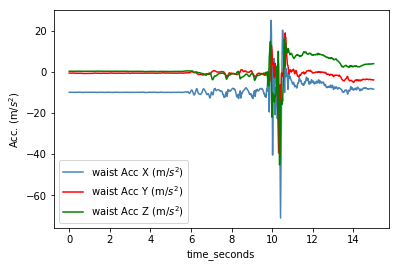

In [8]:
subtype = 'slip'
trial = 'trial1'
subject = 1
trial_type = 'Falls'
df_graph = df[(df.trial_subtype == subtype) & 
              (df.trial_num == trial) &
              (df.subject == subject) &
              (df['trial_type'] == trial_type)
             ][['Time']+meta_acceletarion]

initial_time = df_graph.Time.min()
# Setting the time in seconds and restart the time counting from the first measeure of this trial
df_graph['time_seconds'] = df_graph.Time.apply(lambda x: (x-initial_time)/1000000)

fig, ax = plt.subplots()
df_graph.set_index('time_seconds')['waist Acceleration X (m/s^2)'].plot(color='steelblue', ax=ax, label='waist Acc X (m/$s^2$)')
df_graph.set_index('time_seconds')['waist Acceleration Y (m/s^2)'].plot(color='red',ax=ax, label='waist Acc Y (m/$s^2$)')
df_graph.set_index('time_seconds')['waist Acceleration Z (m/s^2)'].plot(color='green',ax=ax, label='waist Acc Z (m/$s^2$)')
plt.ylabel('Acc. (m/$s^2$)')
ax.legend()

In [9]:
df_graph.shape

(1921, 23)

# Approach 2 - Grouping data in 2.5-second windows

### The calc of the aggregation will be the means


## OBS:

1 - I created 2 separated dataframes - one for mean and one for variance

2 - I'm just considering the files with data from the accelerometers


In [8]:
# group in intervals of 2 seconds, calculating the mean
df_2s_window_mean = df.groupby(['subject','trial_type','trial_subtype','trial_num',pd.Grouper(key='time_datetime', freq='2500000us')])[meta_acceletarion].mean()
df_2s_window_mean = df_2s_window_mean.reset_index()
print('Shape of 2s window mean data', df_2s_window_mean.shape)
df_2s_window_mean.head()
# df_2s_window_mean.shape

Shape of 2s window mean data (4318, 26)


,subject,trial_type,trial_subtype,trial_num,time_datetime,r.ankle Acceleration X (m/s^2),r.ankle Acceleration Y (m/s^2),r.ankle Acceleration Z (m/s^2),l.ankle Acceleration X (m/s^2),l.ankle Acceleration Y (m/s^2),...,l.thigh Acceleration Z (m/s^2),head Acceleration X (m/s^2),head Acceleration Y (m/s^2),head Acceleration Z (m/s^2),sternum Acceleration X (m/s^2),sternum Acceleration Y (m/s^2),sternum Acceleration Z (m/s^2),waist Acceleration X (m/s^2),waist Acceleration Y (m/s^2),waist Acceleration Z (m/s^2)
0,1,ADLs,AS,trial1,2011-05-07 20:39:05.000,-9.604006,-0.313623,-1.641157,-9.642530,-0.000702,...,-1.216927,-9.681068,0.131431,-0.523192,-9.703380,-0.137831,-0.301747,-9.485754,-0.413151,2.402590
1,1,ADLs,AS,trial1,2011-05-07 20:39:07.500,-9.382677,-1.807177,-1.888296,-9.493641,0.844224,...,0.475293,-9.583917,0.291894,-0.936841,-9.271445,0.025740,-2.354189,-9.061236,-0.146159,-2.566998
2,1,ADLs,AS,trial1,2011-05-07 20:39:10.000,-9.738620,-2.866218,-2.231915,-9.364101,2.776896,...,0.324866,-9.573694,0.426931,-2.306972,-9.227117,-0.306899,-3.796945,-9.205295,-0.583010,-4.060932
3,1,ADLs,AS,trial1,2011-05-07 20:39:12.500,-9.556799,-3.094902,-2.164054,-10.288338,2.236983,...,0.338519,-9.308038,0.129510,-1.961314,-9.085675,-0.110195,-3.321590,-9.348276,-0.473525,-2.822297
4,1,ADLs,AS,trial1,2011-05-07 20:39:15.000,-9.279857,-3.457148,-2.095173,-9.420065,1.849185,...,-0.154990,-9.337803,0.581416,-2.889956,-9.025059,-0.246652,-3.962303,-9.236891,-0.614120,-2.572829


In [9]:
# renaming the acceleration measurement columns, including a '_mean' in the end
for col in meta_acceletarion:
    df_2s_window_mean.rename(columns={col: str(col+'_mean')}, inplace=True)

In [10]:
df_2s_window_mean.head()

,subject,trial_type,trial_subtype,trial_num,time_datetime,r.ankle Acceleration X (m/s^2)_mean,r.ankle Acceleration Y (m/s^2)_mean,r.ankle Acceleration Z (m/s^2)_mean,l.ankle Acceleration X (m/s^2)_mean,l.ankle Acceleration Y (m/s^2)_mean,...,l.thigh Acceleration Z (m/s^2)_mean,head Acceleration X (m/s^2)_mean,head Acceleration Y (m/s^2)_mean,head Acceleration Z (m/s^2)_mean,sternum Acceleration X (m/s^2)_mean,sternum Acceleration Y (m/s^2)_mean,sternum Acceleration Z (m/s^2)_mean,waist Acceleration X (m/s^2)_mean,waist Acceleration Y (m/s^2)_mean,waist Acceleration Z (m/s^2)_mean
0,1,ADLs,AS,trial1,2011-05-07 20:39:05.000,-9.604006,-0.313623,-1.641157,-9.642530,-0.000702,...,-1.216927,-9.681068,0.131431,-0.523192,-9.703380,-0.137831,-0.301747,-9.485754,-0.413151,2.402590
1,1,ADLs,AS,trial1,2011-05-07 20:39:07.500,-9.382677,-1.807177,-1.888296,-9.493641,0.844224,...,0.475293,-9.583917,0.291894,-0.936841,-9.271445,0.025740,-2.354189,-9.061236,-0.146159,-2.566998
2,1,ADLs,AS,trial1,2011-05-07 20:39:10.000,-9.738620,-2.866218,-2.231915,-9.364101,2.776896,...,0.324866,-9.573694,0.426931,-2.306972,-9.227117,-0.306899,-3.796945,-9.205295,-0.583010,-4.060932
3,1,ADLs,AS,trial1,2011-05-07 20:39:12.500,-9.556799,-3.094902,-2.164054,-10.288338,2.236983,...,0.338519,-9.308038,0.129510,-1.961314,-9.085675,-0.110195,-3.321590,-9.348276,-0.473525,-2.822297
4,1,ADLs,AS,trial1,2011-05-07 20:39:15.000,-9.279857,-3.457148,-2.095173,-9.420065,1.849185,...,-0.154990,-9.337803,0.581416,-2.889956,-9.025059,-0.246652,-3.962303,-9.236891,-0.614120,-2.572829


In [11]:
# group in intervals of 2 seconds, calculating the variance

df_2s_window_variance = df.groupby(['subject','trial_type','trial_subtype','trial_num',pd.Grouper(key='time_datetime', freq='2500000us')])[meta_acceletarion].var()
df_2s_window_variance = df_2s_window_variance.reset_index()
df_2s_window_variance.head()

,subject,trial_type,trial_subtype,trial_num,time_datetime,r.ankle Acceleration X (m/s^2),r.ankle Acceleration Y (m/s^2),r.ankle Acceleration Z (m/s^2),l.ankle Acceleration X (m/s^2),l.ankle Acceleration Y (m/s^2),...,l.thigh Acceleration Z (m/s^2),head Acceleration X (m/s^2),head Acceleration Y (m/s^2),head Acceleration Z (m/s^2),sternum Acceleration X (m/s^2),sternum Acceleration Y (m/s^2),sternum Acceleration Z (m/s^2),waist Acceleration X (m/s^2),waist Acceleration Y (m/s^2),waist Acceleration Z (m/s^2)
0,1,ADLs,AS,trial1,2011-05-07 20:39:05.000,0.160145,0.840022,0.069312,0.179511,1.015007,...,0.082900,0.171867,0.052945,0.045337,0.180481,0.030084,0.141173,0.212882,0.066554,0.387473
1,1,ADLs,AS,trial1,2011-05-07 20:39:07.500,22.137596,19.895737,5.375997,24.739755,24.162836,...,6.571969,4.471011,2.549350,1.872874,3.830737,1.294985,3.511726,4.085101,1.400227,8.418117
2,1,ADLs,AS,trial1,2011-05-07 20:39:10.000,35.641489,55.187678,9.023295,46.593784,63.327167,...,6.547456,8.170536,3.913095,2.125425,7.019936,1.159340,1.961465,7.310128,1.231231,1.979515
3,1,ADLs,AS,trial1,2011-05-07 20:39:12.500,29.233659,54.654266,9.036276,30.683831,46.505234,...,9.326481,6.511949,3.810866,2.660736,8.458320,1.268985,2.571486,7.434103,1.403955,2.246406
4,1,ADLs,AS,trial1,2011-05-07 20:39:15.000,32.560897,48.788172,8.957763,27.452279,61.381455,...,4.187775,4.867692,3.890561,2.977939,5.011404,1.128295,2.384698,5.628038,1.477972,6.185981


In [12]:
# renaming the acceleration measurement columns, including a '_variance' in the end

for col in meta_acceletarion:
    df_2s_window_variance.rename(columns={col: str(col+'_variance')}, inplace=True)

In [13]:
df_2s_window_variance.head()

,subject,trial_type,trial_subtype,trial_num,time_datetime,r.ankle Acceleration X (m/s^2)_variance,r.ankle Acceleration Y (m/s^2)_variance,r.ankle Acceleration Z (m/s^2)_variance,l.ankle Acceleration X (m/s^2)_variance,l.ankle Acceleration Y (m/s^2)_variance,...,l.thigh Acceleration Z (m/s^2)_variance,head Acceleration X (m/s^2)_variance,head Acceleration Y (m/s^2)_variance,head Acceleration Z (m/s^2)_variance,sternum Acceleration X (m/s^2)_variance,sternum Acceleration Y (m/s^2)_variance,sternum Acceleration Z (m/s^2)_variance,waist Acceleration X (m/s^2)_variance,waist Acceleration Y (m/s^2)_variance,waist Acceleration Z (m/s^2)_variance
0,1,ADLs,AS,trial1,2011-05-07 20:39:05.000,0.160145,0.840022,0.069312,0.179511,1.015007,...,0.082900,0.171867,0.052945,0.045337,0.180481,0.030084,0.141173,0.212882,0.066554,0.387473
1,1,ADLs,AS,trial1,2011-05-07 20:39:07.500,22.137596,19.895737,5.375997,24.739755,24.162836,...,6.571969,4.471011,2.549350,1.872874,3.830737,1.294985,3.511726,4.085101,1.400227,8.418117
2,1,ADLs,AS,trial1,2011-05-07 20:39:10.000,35.641489,55.187678,9.023295,46.593784,63.327167,...,6.547456,8.170536,3.913095,2.125425,7.019936,1.159340,1.961465,7.310128,1.231231,1.979515
3,1,ADLs,AS,trial1,2011-05-07 20:39:12.500,29.233659,54.654266,9.036276,30.683831,46.505234,...,9.326481,6.511949,3.810866,2.660736,8.458320,1.268985,2.571486,7.434103,1.403955,2.246406
4,1,ADLs,AS,trial1,2011-05-07 20:39:15.000,32.560897,48.788172,8.957763,27.452279,61.381455,...,4.187775,4.867692,3.890561,2.977939,5.011404,1.128295,2.384698,5.628038,1.477972,6.185981


In [14]:
# final dataframe, with all accelerometer columns (means and variances)
acceleration_trials = pd.merge(df_2s_window_mean, df_2s_window_variance,on=['subject', 'trial_type', 'trial_subtype', 'trial_num', 'time_datetime'] )
acceleration_trials.head()

,subject,trial_type,trial_subtype,trial_num,time_datetime,r.ankle Acceleration X (m/s^2)_mean,r.ankle Acceleration Y (m/s^2)_mean,r.ankle Acceleration Z (m/s^2)_mean,l.ankle Acceleration X (m/s^2)_mean,l.ankle Acceleration Y (m/s^2)_mean,...,l.thigh Acceleration Z (m/s^2)_variance,head Acceleration X (m/s^2)_variance,head Acceleration Y (m/s^2)_variance,head Acceleration Z (m/s^2)_variance,sternum Acceleration X (m/s^2)_variance,sternum Acceleration Y (m/s^2)_variance,sternum Acceleration Z (m/s^2)_variance,waist Acceleration X (m/s^2)_variance,waist Acceleration Y (m/s^2)_variance,waist Acceleration Z (m/s^2)_variance
0,1,ADLs,AS,trial1,2011-05-07 20:39:05.000,-9.604006,-0.313623,-1.641157,-9.642530,-0.000702,...,0.082900,0.171867,0.052945,0.045337,0.180481,0.030084,0.141173,0.212882,0.066554,0.387473
1,1,ADLs,AS,trial1,2011-05-07 20:39:07.500,-9.382677,-1.807177,-1.888296,-9.493641,0.844224,...,6.571969,4.471011,2.549350,1.872874,3.830737,1.294985,3.511726,4.085101,1.400227,8.418117
2,1,ADLs,AS,trial1,2011-05-07 20:39:10.000,-9.738620,-2.866218,-2.231915,-9.364101,2.776896,...,6.547456,8.170536,3.913095,2.125425,7.019936,1.159340,1.961465,7.310128,1.231231,1.979515
3,1,ADLs,AS,trial1,2011-05-07 20:39:12.500,-9.556799,-3.094902,-2.164054,-10.288338,2.236983,...,9.326481,6.511949,3.810866,2.660736,8.458320,1.268985,2.571486,7.434103,1.403955,2.246406
4,1,ADLs,AS,trial1,2011-05-07 20:39:15.000,-9.279857,-3.457148,-2.095173,-9.420065,1.849185,...,4.187775,4.867692,3.890561,2.977939,5.011404,1.128295,2.384698,5.628038,1.477972,6.185981


### Dataframe with data from **Waist Acceleration**

In [15]:
# get from the metadata dataframe the columns regarding acceleration at waist
acceleration_waist_base = list(meta[(meta.body_location == 'waist') & (meta.measure == 'acceleration')].index)

# generate the list of columns including postfix _mean and _variance 
acceleration_waist = [x+'_mean' for x in acceleration_waist_base]+[x+'_variance' for x in acceleration_waist_base]

columns_base = ['subject', 'trial_type', 'trial_subtype', 'trial_num', 'time_datetime']

# complete list of columns for final dataset
full_columns = columns_base + acceleration_waist
full_columns

['subject',
 'trial_type',
 'trial_subtype',
 'trial_num',
 'time_datetime',
 'waist Acceleration X (m/s^2)_mean',
 'waist Acceleration Y (m/s^2)_mean',
 'waist Acceleration Z (m/s^2)_mean',
 'waist Acceleration X (m/s^2)_variance',
 'waist Acceleration Y (m/s^2)_variance',
 'waist Acceleration Z (m/s^2)_variance']

In [16]:
waist_acceleration_trials = acceleration_trials[full_columns]
waist_acceleration_trials = waist_acceleration_trials.dropna(axis=0, how='any')

In [17]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np

X = waist_acceleration_trials.drop(['trial_type', 'subject', 'trial_subtype', 'trial_num', 'time_datetime'], axis=1)
y = waist_acceleration_trials['trial_type'].values

le = LabelEncoder()
le.fit(['ADLs', 'Falls', 'Near_Falls'])
y = le.transform(y)
v = DictVectorizer(sparse=False)
X = X.values
X, y

(array([[ -9.48575426e+00,  -4.13150723e-01,   2.40259017e+00,
           2.12882201e-01,   6.65538192e-02,   3.87473157e-01],
        [ -9.06123550e+00,  -1.46158731e-01,  -2.56699811e+00,
           4.08510052e+00,   1.40022749e+00,   8.41811688e+00],
        [ -9.20529471e+00,  -5.83009612e-01,  -4.06093172e+00,
           7.31012817e+00,   1.23123084e+00,   1.97951487e+00],
        ..., 
        [ -9.02955157e+00,  -2.93286097e-01,  -2.44748599e+00,
           3.50228049e+00,   1.29646323e+00,   6.52206397e+00],
        [ -9.18225718e+00,  -9.49277256e-01,   3.06013741e+00,
           4.60111271e-02,   2.51660258e-02,   3.67029647e-01],
        [ -9.10446482e+00,  -1.03542865e+00,   3.44432050e+00,
           2.34900967e-03,   3.49081530e-03,   4.77366522e-03]]),
 array([0, 0, 0, ..., 2, 2, 2]))

In [64]:
from sklearn.model_selection import train_test_split
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
clf = svm.SVC(decision_function_shape='ovo', cache_size=500000, coef0=0, C=1, gamma=0.03,  class_weight=None)
print(clf)
clf.fit(X_train, y_train) 
clf.score(X_test, y_test)

SVC(C=1, cache_size=500000, class_weight=None, coef0=0,
  decision_function_shape='ovo', degree=3, gamma=0.03, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


0.59521050598686753